In [1]:
import numpy as np
import scipy.stats as scs

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
test = scs.binom.rvs(n=1,p=0.5,size=10)

In [9]:
for i in range(10):
    print(scs.binom.rvs(n=1,p=0.5,size=10))

[0 1 1 1 0 0 1 0 0 0]
[0 1 1 1 0 1 1 0 0 1]
[1 1 1 1 1 0 1 0 1 1]
[0 0 0 0 0 1 1 1 0 1]
[1 0 0 1 1 0 0 0 0 1]
[1 1 1 0 0 0 1 1 0 1]
[0 0 1 0 1 0 1 1 1 0]
[0 0 0 1 0 1 0 0 0 0]
[0 0 0 1 0 1 0 0 0 0]
[0 0 1 1 1 0 0 0 0 1]


1. Write a coin flipping function which flips any coin (may be unfair) a specified number of times. Your function signature should look like this:

In [58]:
def flip_coin(n_flips, p=0.5):
    sample = scs.binom.rvs(n=1, size=n_flips, p=p)
#     print("Sample Avg for {} flips of P(Heads) = {}: {}".format(n_flips, p, np.mean(sample)))
    return np.mean(sample)

2. Flip a fair coin 1000 times with your function. What will the sample average of these flips be and why? Use np.mean to check.

In [28]:
## The sample average will be 0.5 - give or take a little. 
## Sometimes it will be 0.5 but most of the time it will be slightly more or slightly less than 0.5s

In [27]:
flip_coin(1000)

'Sample Average: 0.496'

3. Flip an unfair coin 1000 times. What will the sample average be now? How would you expect the answer to change depending on how extreme the unfairness is? Use np.mean to check your result.

An "unfair" coin is a coin where the P(Heads) and P(Tails) != 0.5. The sample average of 1000 heads flips will equal the P(Heads) of the coin - give or take a little. The sample average will change in direct proportion to the P(Heads).

In [55]:
flip_coin(1000, p=0)
flip_coin(1000, p=0.1)
flip_coin(1000, p=0.2)
flip_coin(1000, p=0.3)
flip_coin(1000, p=0.4)
flip_coin(1000, p=0.5)
flip_coin(1000, p=0.6)
flip_coin(1000, p=0.7)
flip_coin(1000, p=0.8)
flip_coin(1000, p=0.9)
flip_coin(1000, p=1)

Sample Avg for 1000 flips of P(Heads) = 0: 0.0
Sample Avg for 1000 flips of P(Heads) = 0.1: 0.113
Sample Avg for 1000 flips of P(Heads) = 0.2: 0.196
Sample Avg for 1000 flips of P(Heads) = 0.3: 0.293
Sample Avg for 1000 flips of P(Heads) = 0.4: 0.408
Sample Avg for 1000 flips of P(Heads) = 0.5: 0.489
Sample Avg for 1000 flips of P(Heads) = 0.6: 0.627
Sample Avg for 1000 flips of P(Heads) = 0.7: 0.678
Sample Avg for 1000 flips of P(Heads) = 0.8: 0.815
Sample Avg for 1000 flips of P(Heads) = 0.9: 0.891
Sample Avg for 1000 flips of P(Heads) = 1: 1.0


1.0

4. Now let's see how this all depends on the size of the sample. Create a list with a range of sample sizes, starting at 10, and counting up to 1000 in increments of 10 (list(range(...)) can be used for this). Now, for each of these sample sizes, repeat the experiments above. How does the accuracy of the results depend on the sample size?

In [51]:
range_of_sample_sizes = [i for i in range(1,1001) if i%10==0]
sample_p_values = [0.25,0.5,0.75]

In [53]:
for p in sample_p_values:
    for i in range_of_sample_sizes:
        flip_coin(i,p=p)

Sample Avg for 10 flips of P(Heads) = 0.25: 0.1
Sample Avg for 20 flips of P(Heads) = 0.25: 0.25
Sample Avg for 30 flips of P(Heads) = 0.25: 0.3
Sample Avg for 40 flips of P(Heads) = 0.25: 0.2
Sample Avg for 50 flips of P(Heads) = 0.25: 0.22
Sample Avg for 60 flips of P(Heads) = 0.25: 0.18333333333333332
Sample Avg for 70 flips of P(Heads) = 0.25: 0.24285714285714285
Sample Avg for 80 flips of P(Heads) = 0.25: 0.2375
Sample Avg for 90 flips of P(Heads) = 0.25: 0.2
Sample Avg for 100 flips of P(Heads) = 0.25: 0.13
Sample Avg for 110 flips of P(Heads) = 0.25: 0.24545454545454545
Sample Avg for 120 flips of P(Heads) = 0.25: 0.21666666666666667
Sample Avg for 130 flips of P(Heads) = 0.25: 0.27692307692307694
Sample Avg for 140 flips of P(Heads) = 0.25: 0.25
Sample Avg for 150 flips of P(Heads) = 0.25: 0.2733333333333333
Sample Avg for 160 flips of P(Heads) = 0.25: 0.2
Sample Avg for 170 flips of P(Heads) = 0.25: 0.2647058823529412
Sample Avg for 180 flips of P(Heads) = 0.25: 0.222222222222

As the sample size increases, the Sample Average should be closer to the pre-set P(Heads) -> the expected value of Heads - E[Heads]

5. You're probably feeling like looking at a list of one-hundred numbers is not so illuminating, so plot them! Make a line plot where the x-axis shows the sample size, and the y-axis show the sample mean. Also include a horizontal line for the population value of the expectation.

In [68]:
avgs05 = []
for s in range_of_sample_sizes:
    avgs05.append(flip_coin(s,p=0.5))

avgs025 = []
for s in range_of_sample_sizes:
    avgs025.append(flip_coin(s,p=0.25))

avgs075 = []
for s in range_of_sample_sizes:
    avgs075.append(flip_coin(s,p=0.75))

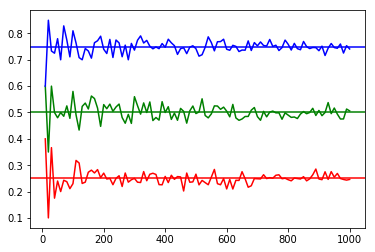

In [70]:
plt.plot(range_of_sample_sizes,avgs05,'g')
plt.plot(range_of_sample_sizes,avgs025,'r')
plt.plot(range_of_sample_sizes,avgs075,'b')
plt.axhline(y=0.5,c='g')
plt.axhline(y=0.25,c='r')
plt.axhline(y=0.75,c='b')

6. Since we are studying a random quantity, it's a good idea to try any experiment multiple times and look for patterns not just within one experiment, but amongst the different experiments.Run the above experiment 100 times, and plot all 100 resulting paths on the same axis.

Describe the pattern that the paths make as a whole. What do you think causes this pattern?

The plots all converge towards 0.5 but there is some variance between the experiments all throughout the plot

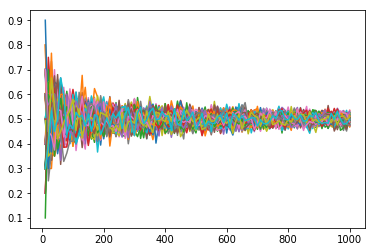

In [71]:
for i in range(100):
    avgs = []
    for s in range_of_sample_sizes:
        avgs.append(flip_coin(s,p=0.5))
    plt.plot(range_of_sample_sizes,avgs)

7. Finally, let's explore what happens when we change the fairness of the coin. Use subplots to draw the same picture as the above, but for different values of the coin fairness (I suggest 0.1, 0.25, 0.5, 0.75 and 0.9). This may take a few seconds to run!

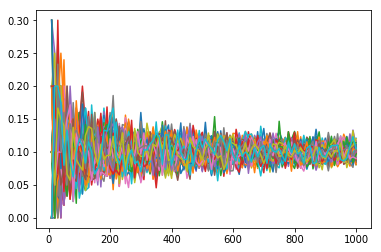

In [90]:
for i in range(100):
    avgs = []
    for s in range_of_sample_sizes:
        avgs.append(flip_coin(s,p=0.1))
    plt.plot(range_of_sample_sizes,avgs)


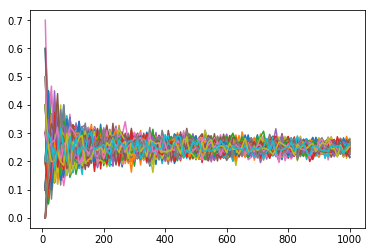

In [91]:
for i in range(100):
    avgs = []
    for s in range_of_sample_sizes:
        avgs.append(flip_coin(s,p=0.25))
    plt.plot(range_of_sample_sizes,avgs)

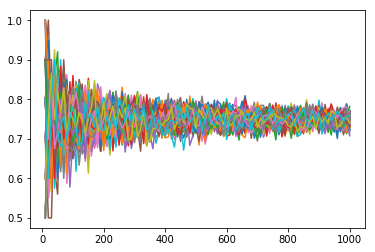

In [92]:
for i in range(100):
    avgs = []
    for s in range_of_sample_sizes:
        avgs.append(flip_coin(s,p=0.75))
    plt.plot(range_of_sample_sizes,avgs)

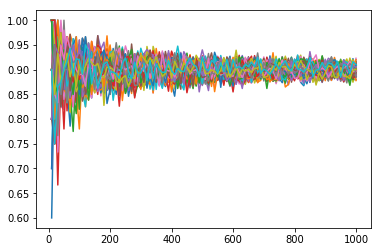

In [93]:
for i in range(100):
    avgs = []
    for s in range_of_sample_sizes:
        avgs.append(flip_coin(s,p=0.9))
    plt.plot(range_of_sample_sizes,avgs)

8. You should notice that the width of the bands is greater for fair coins compared to very unfair coins. This makes sense, for a fair coin the result of the flips is maximally inconsistent, where very unfair coins tend to give the same result often.

We can measure this with the concept of variance or standard deviation as follows

In [94]:
fairnesses = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

For each value of fairness, flip a coin of that fairness 100 times, and then calculate the sample mean of the result (as we have been doing). But now take an extra step: repeat this process 100 times, getting 100 sample means for each value of the coin fairness. Take the variance of these sample means. Plot the results vs the fairness of the coin.

In [104]:

np.var(sample_means)

0.0025623600000000001

In [106]:
fairness_variances = []
for f in fairnesses:
    sample_means = []
    for i in range(100):
        sample_means.append(flip_coin(100,p=f))
    fairness_variances.append(np.var(sample_means))

In [107]:
fairness_variances

[0.0,
 0.00072274999999999987,
 0.0014128400000000003,
 0.002333,
 0.0029941599999999992,
 0.0028147500000000004,
 0.0026800000000000001,
 0.0018497599999999998,
 0.0012469899999999993,
 0.00081275000000000043,
 0.0]

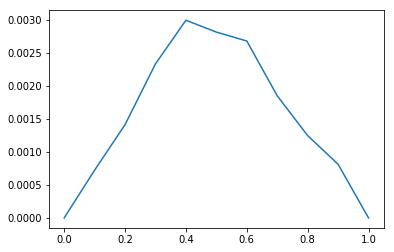

In [108]:
plt.plot(fairnesses,fairness_variances)